# Debugging FBP code

_Srayan Gangopadhyay_  
_Thu 9 Mar 2023_

The key question: why does ASTRA give a dark reconstruction from brightfield images?

The strategy: compare outputs from skimage and ASTRA with sample phantoms.

### Sources
- https://scikit-image.org/docs/stable/auto_examples/transform/plot_radon_transform.html
- https://github.com/astra-toolbox/astra-toolbox/blob/master/samples/python/s014_FBP.py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from recon_debug import *

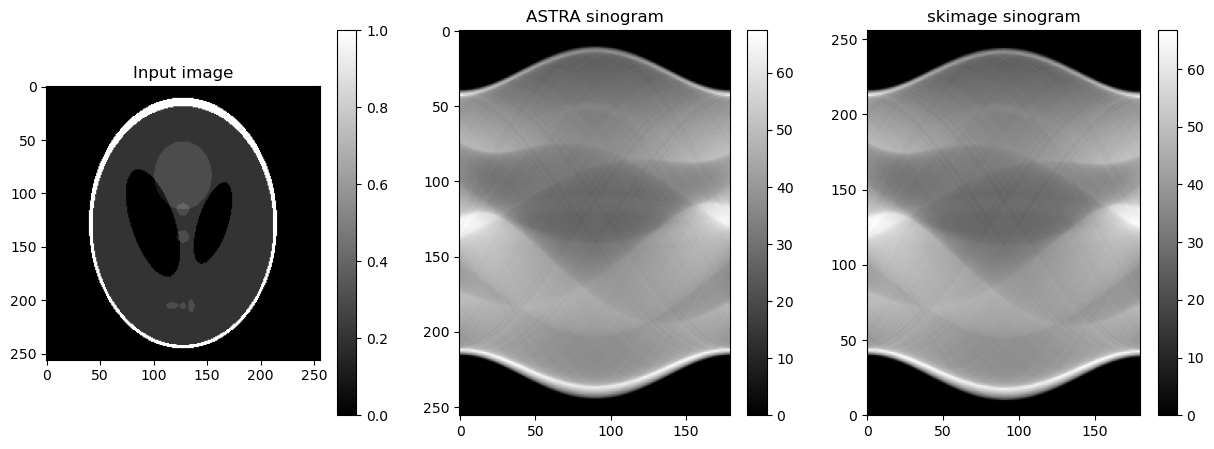

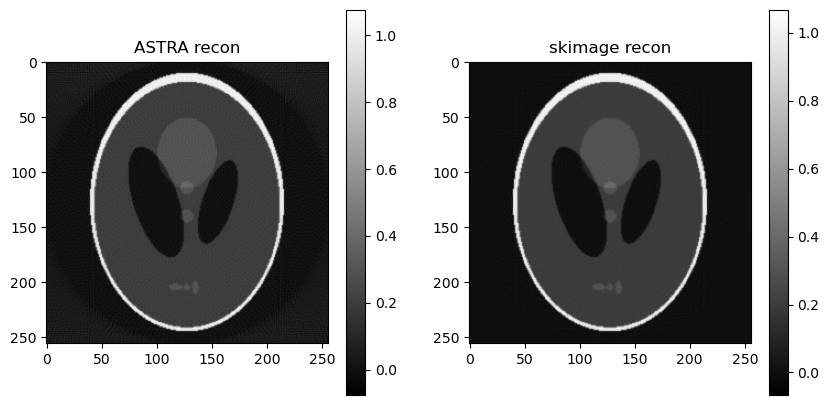

In [2]:
phantom = scipy.io.loadmat(r'D:\MSci_Project\1_Data\phantom.mat')['phantom256']
compare_recons(phantom)

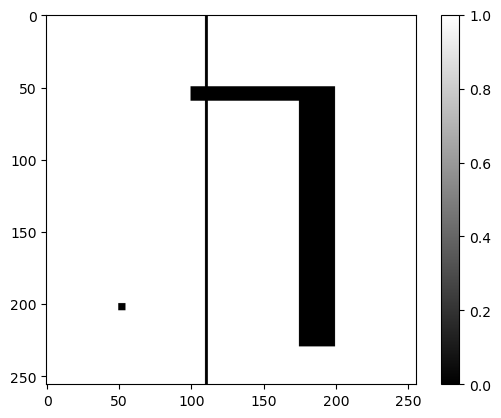

In [3]:
bright_phantom = np.ones((256, 256))
bright_phantom[50:60, 100:200] = 0
bright_phantom[60:230, 175:200] = 0
bright_phantom[200:205, 50:55] = 0
bright_phantom[:, 110:112] = 0
plt.imshow(bright_phantom, cmap='gray')
plt.colorbar()
plt.show()

D:\anaconda3\envs\opt\lib\site-packages\skimage\transform\radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


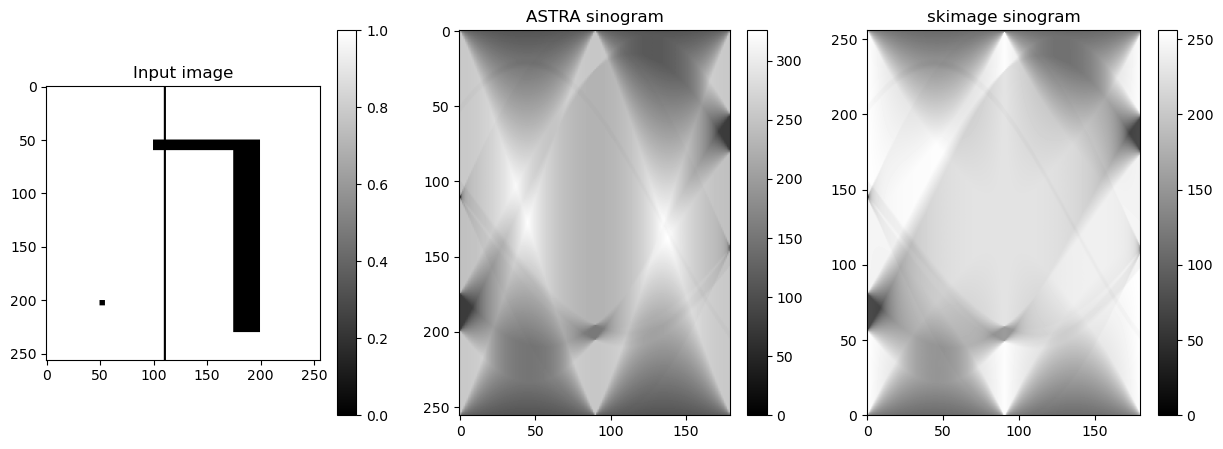

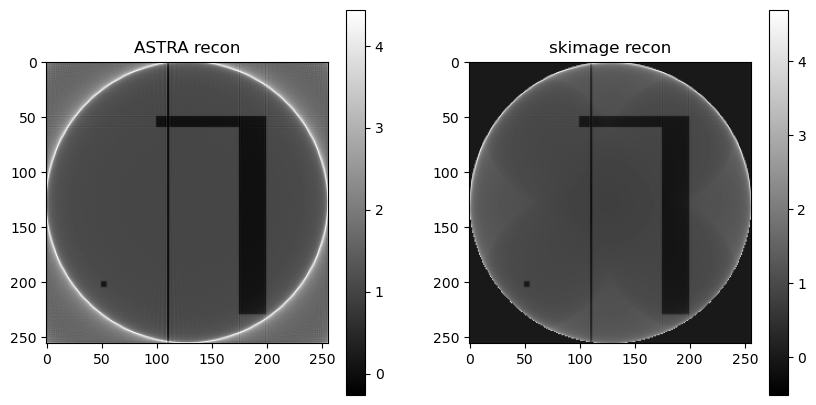

In [4]:
compare_recons(bright_phantom)

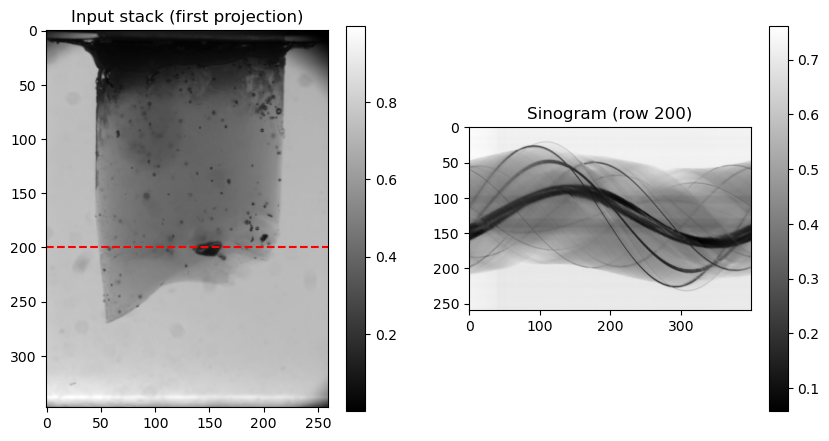

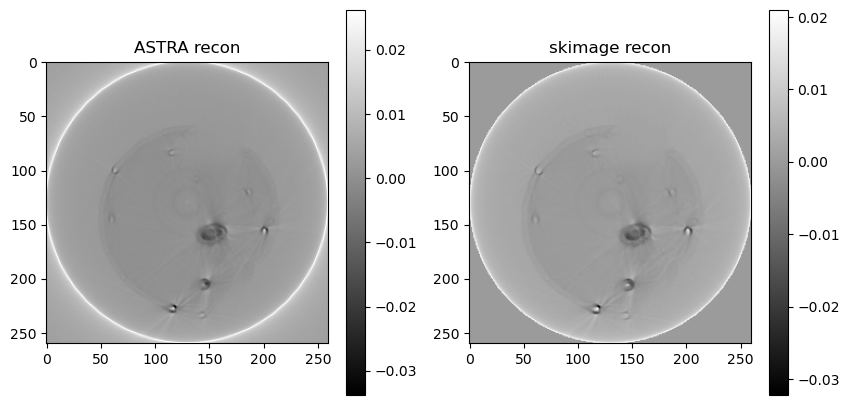

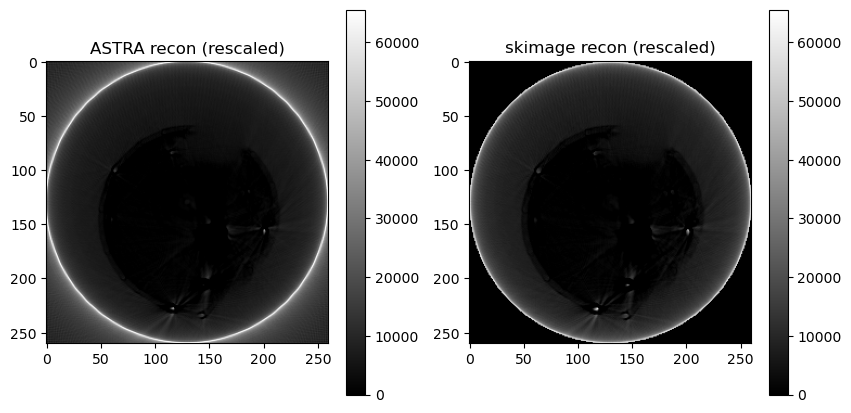

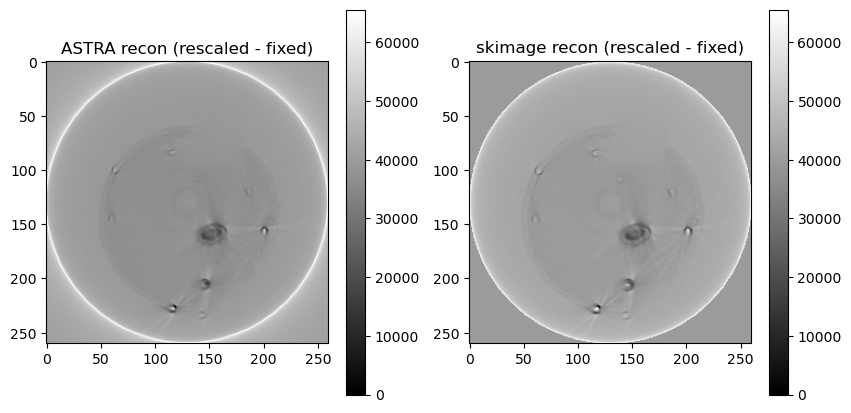

In [5]:
image = io.imread(r'D:\MSci_Project\1_Data\2022-12-01 broken phantom\1_2\1_2_MMStack_Pos0-resized.ome.tif')
im = (image- np.min(image))/np.ptp(image)

compare_recons_2(im, 200)

## Conclusion

The original rescaling, 

```python
    reconstruction[reconstruction < 0] = 0
    reconstruction /= maximum_value
    reconstruction = np.round(reconstruction * 65535).astype(np.uint16)
```

was the issue. Fixed by replacing with

```python
    min_val = np.min(reconstruction)
    max_val = np.max(reconstruction)
    reconstruction = (reconstruction - min_val) / (max_val - min_val) * 65535
```